In [1]:
#!/usr/bin/python
#dbr 7/17/23
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.cm as cm
import seaborn as sns

sns.set_style("ticks")

#for mem
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [100]:
threshhold_name='stringent1000'

df=pd.read_csv('data/wideout-post1yr'+threshhold_name+'.csv')#,index=False)


In [101]:
df.head()

,Unnamed: 0,short_id,agemo_at_ART,f/m,ARTregimen,time_ART_mo,log10VL,cens_vl,log10CD4,log10int,cens_intact,log10def,log10ratio
0,4,1,6.279452,0.0,0.0,13.873973,2.667453,0,NaN,NaN,0,NaN,NaN
1,5,1,6.279452,0.0,0.0,17.095890,2.342423,0,3.228400,NaN,0,NaN,NaN
2,6,1,6.279452,0.0,0.0,20.021918,2.602060,0,NaN,NaN,0,NaN,NaN
3,7,1,6.279452,0.0,0.0,22.849315,1.875061,1,3.499412,1.764901,0,2.778382,-1.013481
4,8,1,6.279452,0.0,0.0,27.156164,2.255273,0,3.518514,NaN,0,NaN,NaN


In [102]:
#first see how many data points after 20 months?

dfmem = df[['short_id','time_ART_mo','log10int']].dropna()

dfmem['lI']=np.log(10**dfmem['log10int']) #natural log scale

/Users/dreeves/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


half-life (mo) [mean,lower,upper]
intact half-life [ 54.50499207  16.25490745 -40.28035759]


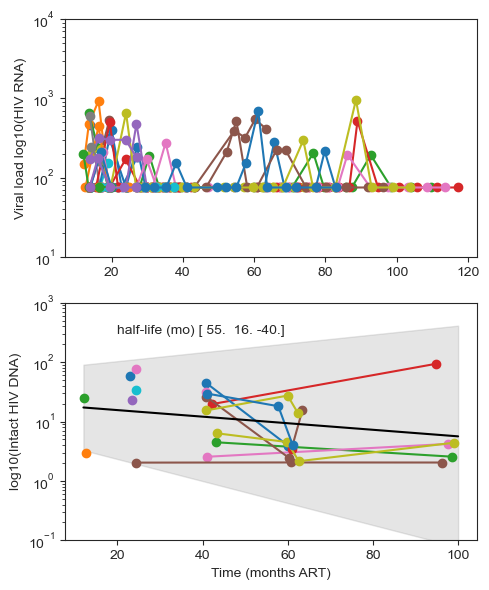

In [103]:
#run MEM for first phase VL
md = smf.mixedlm('lI ~ time_ART_mo', dfmem, groups=dfmem['short_id'], re_formula='time_ART_mo')
mdf = md.fit()
mem_results=[mdf.params[1],mdf.conf_int().iloc[1,0],mdf.conf_int().iloc[1,1],
             mdf.params[0],mdf.conf_int().iloc[0,0],mdf.conf_int().iloc[0,1]]

print('half-life (mo) [mean,lower,upper]')
print('intact half-life',-np.log(2)/mem_results[:3])

simt=np.linspace(12,100,1000)

nwI=0; nlong=0
plt.figure(figsize=(5,6))
for s in df['short_id'].unique():
    tdf=df[df['short_id']==s]
    
    tdfI = tdf[['time_ART_mo','log10int']].dropna()
    if len(tdfI)>0:
        nwI+=1
    if len(tdfI)>1:
        nlong+=1
    
    plt.subplot(211)
    plt.semilogy(tdf['time_ART_mo'],10**tdf['log10VL'],marker='o')
    plt.ylim([10,1e4])
    plt.ylabel('Viral load log10(HIV RNA)')

    plt.subplot(212)
    plt.semilogy(tdfI['time_ART_mo'],10**tdfI['log10int'],marker='o')
    plt.ylim([1e-1,1e3])
    plt.ylabel('log10(Intact HIV DNA)')
    
plt.xlabel('Time (months ART)')
plt.plot(simt,np.exp(mem_results[0]*simt+mem_results[3]),color='k')
plt.fill_between(simt,np.exp(mem_results[1]*simt+mem_results[4]),
         np.exp(mem_results[2]*simt+mem_results[5]),color='gray',alpha=0.2)
    
plt.annotate('half-life (mo) '+str(np.round(-np.log(2)/mem_results[:3])),[20,300])
    
plt.tight_layout()
plt.savefig('figures/S4memcheck'+threshhold_name+'.png',dpi=600)

In [104]:
print(nwI,nlong)

17 9
